# Deep Learning Digit Recognizer

This project implements a Convolutional Neural Network (CNN) model to recognize handwritten digits using the MNIST dataset. The dataset consists of 60,000 training images and 10,000 test images of handwritten digits (0-9). The goal is to classify each image into one of the 10 digit classes.

---

## Step 1: Import Libraries

We begin by importing the necessary libraries for data loading, preprocessing, model building, and visualization.


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


---

## Step 2: Load and Preprocess the Data

The MNIST dataset is available directly through Keras. We will load the dataset and then preprocess it by:
- Reshaping the images to fit the input format expected by the CNN.
- Normalizing the pixel values to be between 0 and 1.
- One-hot encoding the labels (digits) for classification.

---


In [3]:
# Load MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to fit CNN model (28x28 images with 1 channel)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode target labels (digits)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28, 1), Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1), Test labels shape: (10000, 10)


---

## Step 3: Visualize Sample Data

Before proceeding with model building, let's visualize a few samples from the dataset to understand what it looks like.

---


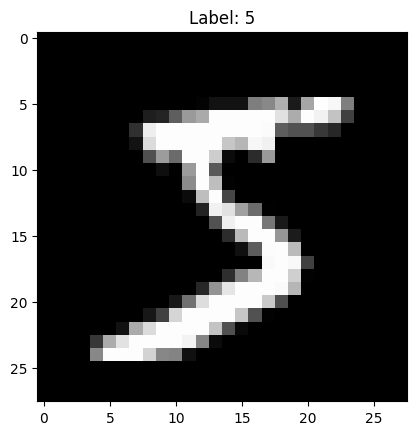

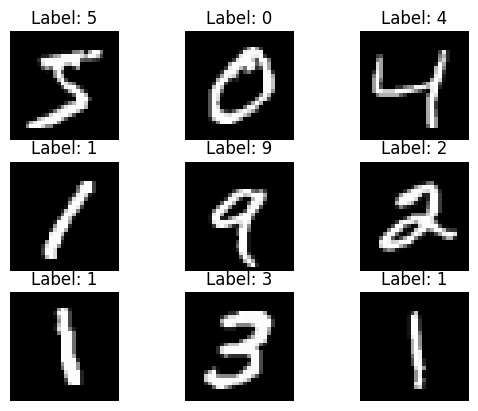

In [4]:
# Visualize a sample image from the training set
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()

# Display multiple images from the training set
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()


---

## Step 4: Build the Convolutional Neural Network (CNN) Model

We will now build a CNN model using Keras. The architecture consists of:
- A convolutional layer with ReLU activation.
- A max-pooling layer for down-sampling.
- A flattening layer to convert the feature maps into a vector.
- A dense layer with ReLU activation for classification.
- A final dense layer with softmax activation for multi-class classification.

---


In [5]:
# Build CNN model using Keras Sequential API
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # Output layer for 10 classes (digits)

# Compile the model with Adam optimizer and categorical crossentropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary to see its architecture
model.summary()


C:\Users\shash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

---

## Step 5: Train the Model

We will now train our CNN model on the training data. We'll use:
- **Epochs**: The number of times the model sees the entire training data.
- **Batch size**: The number of samples processed before updating the model's weights.

We'll also track validation accuracy on test data during training.

---


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8804 - loss: 0.4229 - val_accuracy: 0.9716 - val_loss: 0.0930
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9756 - loss: 0.0823 - val_accuracy: 0.9796 - val_loss: 0.0641
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9861 - loss: 0.0474 - val_accuracy: 0.9809 - val_loss: 0.0554
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9902 - loss: 0.0334 - val_accuracy: 0.9861 - val_loss: 0.0422
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9924 - loss: 0.0255 - val_accuracy: 0.9855 - val_loss: 0.0437
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9946 - loss: 0.0182 - val_accuracy: 0.9855 - val_loss: 0.0420
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9961 - loss: 0.0133 - val_accuracy: 0.9867 - val_loss: 0.0394
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9966 - loss: 0.0121 - val_ac

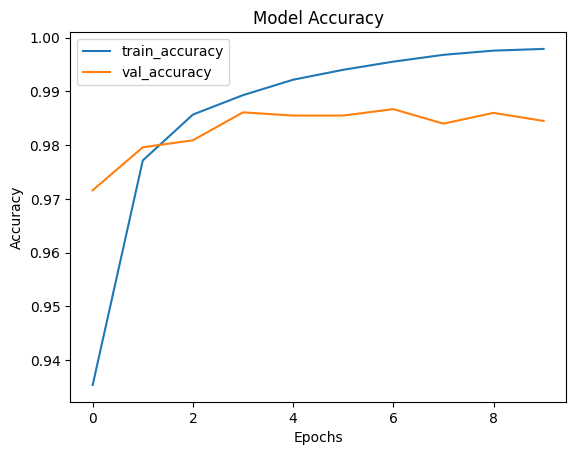

In [6]:
# Train the CNN model on MNIST data for 10 epochs with batch size of 128
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

# Plot training history (accuracy and validation accuracy)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


---

## Step 6: Evaluate Model Performance

After training is complete, we will evaluate our model's performance on unseen test data. This will give us an idea of how well our model generalizes to new data.

---


In [7]:
# Evaluate model performance on test data (unseen)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9814 - loss: 0.0651
Test accuracy: 0.9845


---

## Step 7: Make Predictions

Finally, let's use our trained model to make predictions on some sample test images and compare them with their true labels.

---


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


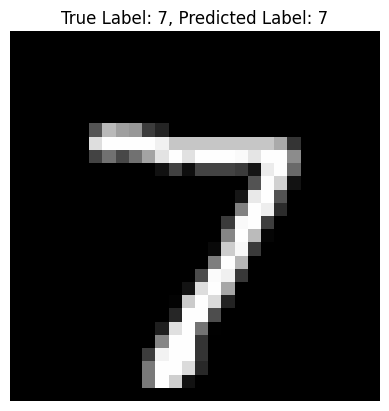

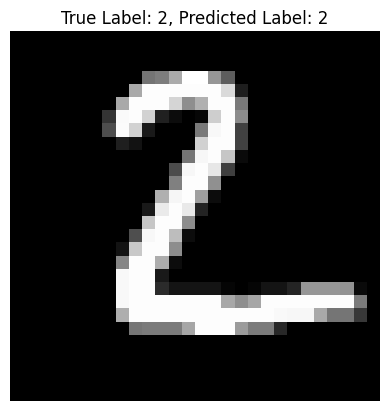

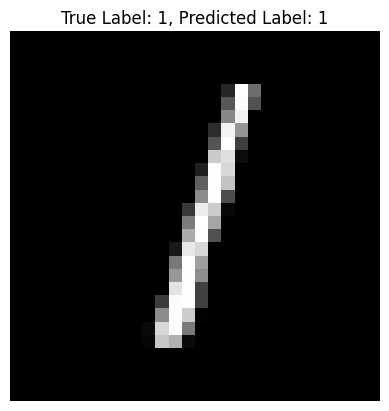

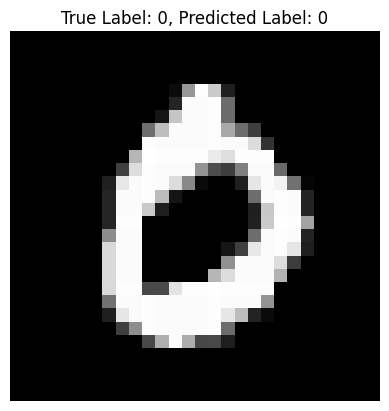

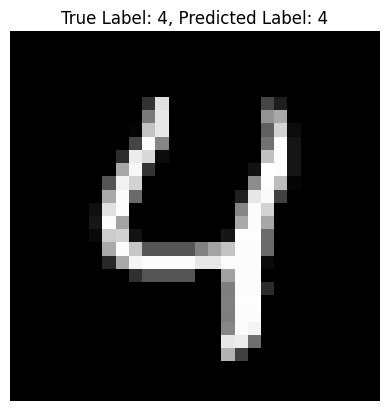

In [8]:
# Make predictions on test data using the trained model
predictions = model.predict(x_test)

# Display some predictions alongside their true labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True Label: {np.argmax(y_test[i])}, Predicted Label: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()


---

## Conclusion

In this notebook:
- We loaded and preprocessed the MNIST dataset.
- Built a Convolutional Neural Network (CNN) using Keras.
- Trained and evaluated our model on handwritten digit recognition.
- Achieved a high accuracy on both training and test sets.

This concludes our implementation of a deep learning digit recognizer using CNNs!

---
